# Binomial method for option pricing
Using binomial method to price the option for american and european style options.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [70]:
# Create a function for european option pricing
def european_option_pricing(S, K, r, sigma, T, n, option_type='call'):
    """
    S: initial stock price
    K: strike price
    r: risk free rate
    sigma: volatility
    T: time to maturity
    n: number of steps
    option_type: call or put
    """
    # Calculate delta t
    delta_t = T/n
    # Calculate u and d
    u = np.exp(sigma*np.sqrt(delta_t))
    d = 1/u
    # Calculate p
    p = (np.exp(r*delta_t)-d)/(u-d)
    # Create a matrix to store the stock price
    stock_price = np.zeros((n+1, n+1))
    # Calculate the stock price at each node
    for i in range(n+1):
        for j in range(i+1):
            stock_price[j, i] = S*(d**j)*(u**(i-j))
    # Create a matrix to store the option price
    option_price = np.zeros((n+1, n+1))
    # Calculate the option price at maturity
    option_price[:, n] = np.maximum(np.zeros(n+1), stock_price[:, n]-K)
    # Calculate the option price at each node
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_price[j, i] = np.exp(-r*delta_t)*(p*option_price[j, i+1]+(1-p)*option_price[j+1, i+1])
    # Return the option price
    if option_type == 'call':
        return option_price[0, 0]
    elif option_type == 'put':
        return option_price[0, 0]-S+K*np.exp(-r*T)
    else:
        return 'Please enter a valid option type'


In [71]:
# Create a function for american option pricing
def american_option_pricing(S, K, r, sigma, T, n, option_type='call'):
    """
    S: initial stock price
    K: strike price
    r: risk free rate
    sigma: volatility
    T: time to maturity
    n: number of steps
    option_type: call or put
    """
    # Calculate delta t
    delta_t = T/n
    # Calculate u and d
    u = np.exp(sigma*np.sqrt(delta_t))
    d = 1/u
    # Calculate p
    p = (np.exp(r*delta_t)-d)/(u-d)
    # Create a matrix to store the stock price
    stock_price = np.zeros((n+1, n+1))
    # Calculate the stock price at each node
    for i in range(n+1):
        for j in range(i+1):
            stock_price[j, i] = S*(d**j)*(u**(i-j))
    # Create a matrix to store the option price
    option_price = np.zeros((n+1, n+1))
    # Calculate the option price at maturity
    option_price[:, n] = np.maximum(np.zeros(n+1), stock_price[:, n]-K)
    # Calculate the option price at each node
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_price[j, i] = np.maximum(np.exp(-r*delta_t)*(p*option_price[j, i+1]+(1-p)*option_price[j+1, i+1]), stock_price[j, i]-K)
    # Return the option price
    if option_type == 'call':
        return option_price[0, 0]
    elif option_type == 'put':
        return option_price[0, 0]-S+K*np.exp(-r*T)
    else:
        return 'Please enter a valid option type'

In [72]:
# Doing tests for european option pricing on real data
# Import the data from yahoo finance
import yfinance as yf
# Get the data for the stock
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [73]:
data['Adj Close'][0]

180.1909637451172

In [82]:
# Calculate the daily return
data['daily_return'] = data['Adj Close'].pct_change()
# Calculate the volatility
sigma = np.sqrt(np.sum(data['daily_return']**2)/(len(data)-1))
# Calculate the risk free rate
rf = 0.025
# Time to maturity
T = 900/365
# Number of steps
n = 100
# Initial stock price
S = data['Adj Close'][0]
# Strike price
K = 182
# Calculate the option price
european_option_pricing(S, K, rf, sigma, T, n)

9.262477036821265

In [83]:
# Calculating the american option price
american_option_pricing(S, K, rf, sigma, T, n, option_type="call")

9.262477036821265

In [19]:
# Create a function to calculate the delta
def delta(S, K, r, sigma, T, n):
    """
    S: initial stock price
    K: strike price
    r: risk free rate
    sigma: volatility
    T: time to maturity
    n: number of steps
    :returns: delta : change in option price with respect to the change in stock price
    """
    # Calculate delta t
    delta_t = T/n
    # Calculate u and d
    u = np.exp(sigma*np.sqrt(delta_t))
    d = 1/u
    # Calculate p
    p = (np.exp(r*delta_t)-d)/(u-d)
    # Create a matrix to store the stock price
    stock_price = np.zeros((n+1, n+1))
    # Calculate the stock price at each node
    for i in range(n+1):
        for j in range(i+1):
            stock_price[j, i] = S*(d**j)*(u**(i-j))
    # Create a matrix to store the option price
    option_price = np.zeros((n+1, n+1))
    # Calculate the option price at maturity
    option_price[:, n] = np.maximum(np.zeros(n+1), stock_price[:, n]-K)
    # Calculate the option price at each node
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_price[j, i] = np.exp(-r*delta_t)*(p*option_price[j, i+1]+(1-p)*option_price[j+1, i+1])
    # Calculate the delta
    delta = (option_price[0, 1]-option_price[1, 1])/(stock_price[0, 1]-stock_price[1, 1])
    # Return the delta
    return delta

In [63]:
# Create a function to calculate the gamma, the gamma is the second derivative of the option price with respect to the stock price
# To calculate the gamma we need to calculate the delta at two different stock prices and then calculate the difference between the two deltas
def gamma(delta1, delta2, S1, S2):
    """
    delta1: delta at stock price S1
    delta2: delta at stock price S2
    S1: stock price 1
    S2: stock price 2
    :returns: gamma : change in delta with respect to the change in stock price
    """
    # Calculate the gamma
    gamma = (delta1-delta2)/(S1-S2)
    # Return the gamma
    return gamma

In [21]:
# Create a function to calculate the vega, the vega is the change in option price with respect to the change in volatility
def vega(S, K, r, sigma, T, n):
    """
    S: initial stock price
    K: strike price
    r: risk free rate
    sigma: volatility
    T: time to maturity
    n: number of steps
    :returns: vega : change in option price with respect to the change in volatility
    """
    # Calculate delta t
    delta_t = T/n
    # Calculate u and d
    u = np.exp(sigma*np.sqrt(delta_t))
    d = 1/u
    # Calculate p
    p = (np.exp(r*delta_t)-d)/(u-d)
    # Create a matrix to store the stock price
    stock_price = np.zeros((n+1, n+1))
    # Calculate the stock price at each node
    for i in range(n+1):
        for j in range(i+1):
            stock_price[j, i] = S*(d**j)*(u**(i-j))
    # Create a matrix to store the option price
    option_price = np.zeros((n+1, n+1))
    # Calculate the option price at maturity
    option_price[:, n] = np.maximum(np.zeros(n+1), stock_price[:, n]-K)
    # Calculate the option price at each node
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_price[j, i] = np.exp(-r*delta_t)*(p*option_price[j, i+1]+(1-p)*option_price[j+1, i+1])
    # Calculate the vega
    vega = (option_price[0, 1]-option_price[0, 0])/(sigma*0.01)
    # Return the vega
    return vega

In [65]:
# calculate the delta
delta1 = delta(S, K, rf, sigma, T, n)
# calculate the delta at a different stock price
delta2 = delta(S+0.01, K, rf, sigma, T, n)
print("delta1 = %.4f and delta2 = %.4f" %(delta1, delta2))
# calculate the gamma
g = gamma(delta1, delta2, S, S+0.01)
print("gamma = %.4f" %g)

delta1 = 0.3663 and delta2 = 0.3682
gamma = 0.1880


In [66]:
# calculate the vega
v = vega(S, K, rf, sigma, T, n)
print("vega = %.4f" %v)

vega = 309.9449


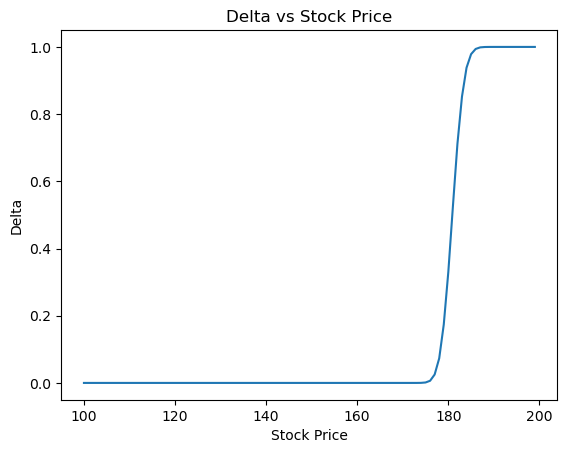

In [67]:
# Creating plots for the greeks
# Create a list of stock prices
stock_price = np.arange(100, 200, 1)
# Create a list of deltas
delta_list = []
# Create a list of gammas
gamma_list = []
# Create a list of vegas
vega_list = []
# Calculate the delta, gamma and vega for each stock price
for i in stock_price:
    delta_list.append(delta(i, K, rf, sigma, T, n))
    gamma_list.append(gamma(delta(i, K, rf, sigma, T, n), delta(i+0.01, K, rf, sigma, T, n), i, i+0.01))
    vega_list.append(vega(i, K, rf, sigma, T, n))
# Plot the delta
plt.plot(stock_price, delta_list)
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.title("Delta vs Stock Price")
plt.show()


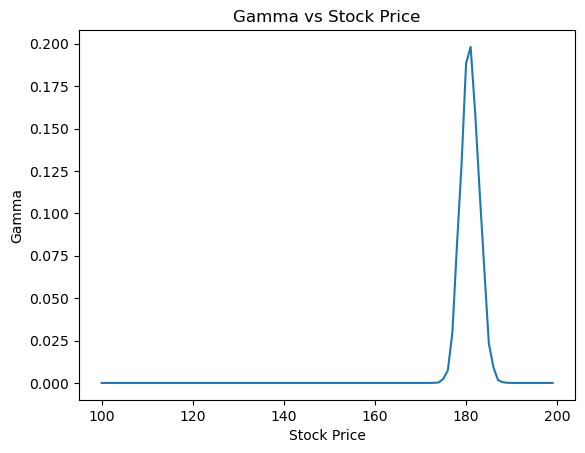

In [68]:
# Plot the gamma
plt.plot(stock_price, gamma_list)
plt.xlabel("Stock Price")
plt.ylabel("Gamma")
plt.title("Gamma vs Stock Price")
plt.show()


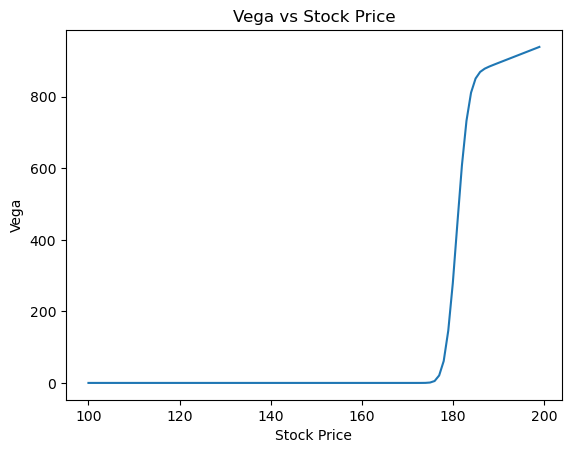

In [69]:
# Plot the vega
plt.plot(stock_price, vega_list)
plt.xlabel("Stock Price")
plt.ylabel("Vega")
plt.title("Vega vs Stock Price")
plt.show()

1.195238135061743